# Supplemental Information Section D - Simple model of affinity chromatography

In [1]:
# load the required python packages

# Our numerical workhorses
import numpy as np

# # Import the project utils
import sys
sys.path.insert(0, '../code/')
import NB_sortseq_utils as utils

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
utils.set_plotting_style1()
%matplotlib inline

In the supplemental material we develop a simple thermodynamic model of the DNA affinity
chromatography process. This was used to to develop some intuition about how different parameters
such the presence of competitor proteins might influence the enrichment of the target
transcription factor. We found that the probability of our target protein bound to
a DNA target, $P_{bound, DNA}$, will be given by

\begin{equation}
  P_{bound, DNA} = \frac{\frac{C_{TF}}{C_o} e^{-\beta \Delta
  \varepsilon_{TF,DNA}}}{1 + \frac{C_{ns}}{C_o} e^{-\beta \Delta \varepsilon_{ns}} +
  \frac{C_{TF}}{C_o} e^{-\beta \Delta \varepsilon_{TF,DNA}}}.
\end{equation}
Here the subscript $TF,DNA$ identifies the target transcription factor
and the DNA target, with $\Delta
\varepsilon_{TF,DNA}$ then referring to the binding energy of the transcription factor
to the target DNA binding site. In addition, $\Delta
\varepsilon_{ns}$ refers to the binding energy of other 'competitor' proteins present in
the lysate that may bind the DNA nonspecifically. We similarly calculate the probability 
of the unbound state or when a non-specific protein 
is bound to the DNA. 

Here we use some reasonable values for $E. coli$ to plot
the fraction of each state (unbound, bound by the target transcription factor, 
and bound by a nonspecific protein). We let $C_o = 1 M$, $\Delta
\varepsilon_{TF,s} =$ - $15 k_B T$, and $\Delta \varepsilon_{ns} =$ - $5 k_B T$, 
$C_{ns} = 3 \cdot 10^{-3} M$, which is the approximate number of proteins in
$E. coli$. The specific numbers will depend on the DNA target sequence
used, the concentration of target protein, as well as the lysate preparation
itself - so these calculations represent an approximation and serve to show expected
trends as a function of these different parameters. 

In [98]:
# Concentrations in M
C_ns = 3*10**-3
C_tf = np.arange(0,10**4)*10**-9
C_o = 1

# Energies in kBT
epsilon_tf_DNA = -15
epsilon_ns = -5

def P_bound(C_ns, C_tf, C_o, epsilon_ns, epsilon_tf, state):
    """ Use this function to calculate the probability 
    of our target protein being bound to a certain 
    DNA target."""
    state_type = {'unbound': 0,'TF_bound': 1, 'ns_bound': 2}
    
    bound_weights = np.ones([3,len(C_tf)]) 
    bound_weights[1] = (C_tf/C_o)*np.exp(-epsilon_tf)
    bound_weights[2] = (C_ns/C_o)*np.exp(-epsilon_ns)

    pbound = bound_weights[state_type[state]] / \
            bound_weights.sum(axis=0)
        
    return pbound

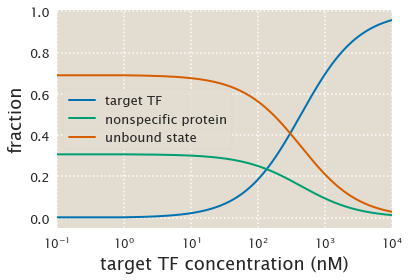

In [99]:
# plot the probability of each state

plt.plot(C_tf*10**9,P_bound(C_ns, C_tf, C_o, epsilon_ns, epsilon_tf_DNA, 'TF_bound'), label = 'target TF')
plt.plot(C_tf*10**9,P_bound(C_ns, C_tf, C_o, epsilon_ns, epsilon_tf_DNA, 'ns_bound'), label = 'nonspecific protein')
plt.plot(C_tf*10**9,P_bound(C_ns, C_tf, C_o, epsilon_ns, epsilon_tf_DNA, 'unbound'), label = 'unbound state')
plt.xlabel('target TF concentration (nM)')
plt.ylabel('fraction')
plt.xlim(0.1,10**4)
plt.legend()
plt.xscale('log')

As an example, when we consider a concentration $C_{TF} = 10^{-8} M$ (about 10 copies per cell),
we find the fraction of bound transcription factor is $\approx 0.02$. In contrast, for fraction of the nonspecifically bound fraction is roughly ten fold larger. At least qualitatively, this appears 
reasonable since when we perform such an experiment it is common to observe several
hundred proteins in the enriched sample (as determined by mass spectrometry analysis). 
As the concentration of target transcription grows, we see that the bound transcription factor eventually becomes the dominant state, which will also depend on the target transcription factor's binding energy to the DNA.